In [1]:
%matplotlib inline

In [64]:
#dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
from matplotlib.ticker import MultipleLocator
import scipy.stats as sts

In [3]:
#files to load

city_data_to_load = 'resources/city_data.csv'
ride_data_to_load = 'resources/ride_data.csv'

#city data DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#ride data DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#get the columns and the rows that are not null for city DataFrame
city_data_df.count()
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
#get the data types of each column for city DataFrame
city_data_df.count()
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
#get the unique values of the type of city 
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
#get the number of data points from the urban cities
sum(city_data_df['type'] == 'Urban')

66

In [9]:
#get the number of data points from the rural & suburban cities
print(sum(city_data_df['type'] == 'Suburban'))
print(sum(city_data_df['type'] == 'Rural'))

36
18


In [10]:
#get the columns and rows that are not null for ride data DataFrame
ride_data_df.count()
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
#get the data types of each column for the ride data DataFrame
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
#combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])

#display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
#Create the urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
#Create the suburban city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [15]:
#create the rural cities DataFrame
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [16]:
#get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
#get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [18]:
#get the number of rides for rural cities
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [19]:
#get the average fare for each city in urban cities

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
#get the average fare for each city in suburban cities

suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [21]:
#get the average fare for each city in rural cities

rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [22]:
#get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
#get the average number of drivers for each suburban city
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [24]:
#get the average number of drivers for each rural city
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

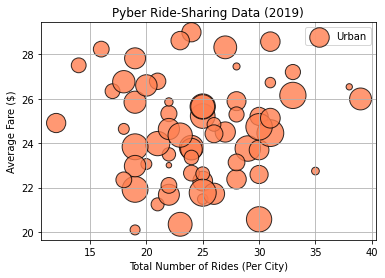

In [25]:
#build the scatter plots for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c='coral',
            edgecolor='black', linewidth=1,
            alpha = 0.8, label = "Urban"
        )

plt.title('Pyber Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
#add legend
plt.legend()

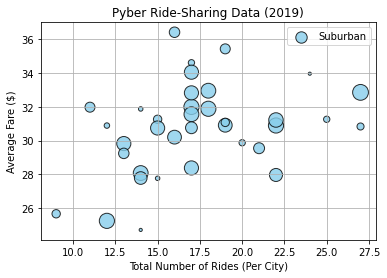

In [27]:
#build the scatter plots for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue',
            edgecolor='black', linewidth=1,
            alpha = 0.8, label = "Suburban"
        )

plt.title('Pyber Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
#add legend
plt.legend()

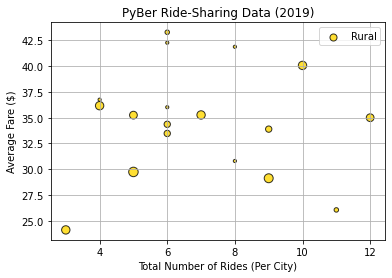

In [33]:
#build the scatter plots for rural cities
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidth=1,
           alpha=0.8, label='Rural'
           )

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

#add legend
plt.legend()

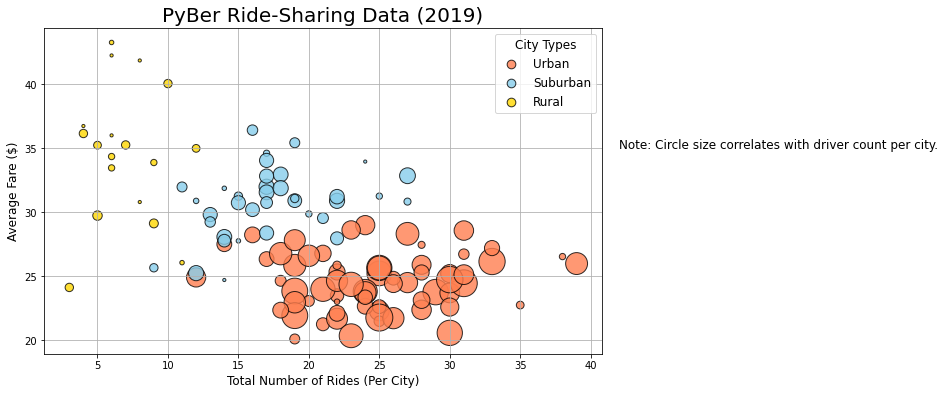

In [49]:
#enlarge figure size
plt.subplots(figsize =(10,6))

#Add the scatter charts for each type of city
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c='coral',
            edgecolor='black', linewidth=1,
            alpha = 0.8, label = "Urban"
        )


plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue',
            edgecolor='black', linewidth=1,
            alpha = 0.8, label = "Suburban"
        )


plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidth=1,
           alpha=0.8, label='Rural'
           )

#add labels, title, grid
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#create a legend - fontsize here is for the legend text not the title!
lgnd = plt.legend(fontsize = '12', mode='Expanded',
                 scatterpoints = 1, loc = 'best', title='City Types')
#set each marker to a size
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

#grabs the title and sets its fontsize to 12
lgnd.get_title().set_fontsize(12)

#incorporate a text label about circly sizr

plt.text(42,35, 'Note: Circle size correlates with driver count per city.', fontsize='12')


# Save the figure.
plt.savefig("analysis/Fig1.png")

#show the plot

plt.show()

In [50]:
#get summary statistics for urban cities

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [52]:
#get summary statistics for suburban cities

suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [53]:
#get summary statistics for rural cities

rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [54]:
#get summary statistics of ride count for urban cities

urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [56]:
#get summary statistics of ride count for suburban cities

suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [57]:
#get summary statistics of ride count for rural cities

rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [58]:
#calculate the mean of the ride cout for each city type

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [65]:
#calculate the median of the ride cout for each city type

round(urban_ride_count.median()), round(suburban_ride_count.median()), round(rural_ride_count.median())

(24, 17, 6)

In [66]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [67]:
#Calculate the mode of the ride count for suburban cities
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [62]:
#Calculate the mode of the ride count for rural cities
rural_ride_count.mode()

0    6
Name: ride_id, dtype: int64

In [70]:
#calculate the measures of central tendency for the ride count for the urban cities - using NumPy & SciPy
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [73]:
#calculate the measures of central tedency for the ride count for suburban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for the suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for the suburban trips is {mode_suburban_ride_count}.")


The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for the suburban trips is 17.0.
The mode for the ride counts for the suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [74]:
#calculate the measures of central tedency for the ride count for suburban cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for the suburban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for the suburban trips is {mode_rural_ride_count}.")

The mean for the ride counts for suburban trips is 6.94.
The median for the ride counts for the suburban trips is 6.0.
The mode for the ride counts for the suburban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [75]:
#get the fares for the urban cities

urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [80]:
#using NumPy & SciPy we calculate the measures of central tendency for the fares for urban cities

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [81]:
#get the fares for the suburban cities
suburban_fares = suburban_cities_df['fare']
#using NumPy & SciPy we calculate the measures of central tendency for the fares for suburban cities

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [82]:
#get the fares for the rural cities
rural_fares = rural_cities_df['fare']
#using NumPy & SciPy we calculate the measures of central tendency for the fares for suburban cities

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is ${mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [83]:
#get the driver count data from the urban cities

urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [84]:
#get the driver count data from suburban and rural cities
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [89]:
#calculate the measures of central tendency for all types of cities
#suburban
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

#suburban
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

#rural
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

#print urban values
print(f"The mean number of drivers for urban cities is {mean_urban_drivers:.0f}.")
print(f"The median number of drivers for urban cities is {median_urban_drivers}.")
print(f"The mode number of drivers for urban cities is {mode_urban_drivers}.")

#print suburban values
print(f"The mean number of drivers for suburban cities is {mean_suburban_drivers:.0f}.")
print(f"The median number of drivers for suburban cities is {median_suburban_drivers}.")
print(f"The mode number of drivers for suburban cities is {mode_suburban_drivers}.")

#print rural values
print(f"The mean number of drivers for rural cities is {mean_rural_drivers:.0f}.")
print(f"The median number of drivers for rural cities is {median_rural_drivers}.")
print(f"The mode number of drivers for rural cities is {mode_rural_drivers}.")

The mean number of drivers for urban cities is 37.
The median number of drivers for urban cities is 37.0.
The mode number of drivers for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean number of drivers for suburban cities is 14.
The median number of drivers for suburban cities is 16.0.
The mode number of drivers for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean number of drivers for rural cities is 4.
The median number of drivers for rural cities is 4.0.
The mode number of drivers for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


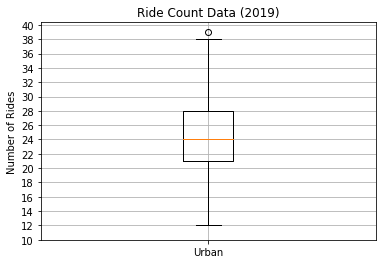

In [100]:
#create a box-and-whiskers plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

#add the title, y-axis label and grid

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()

plt.show()

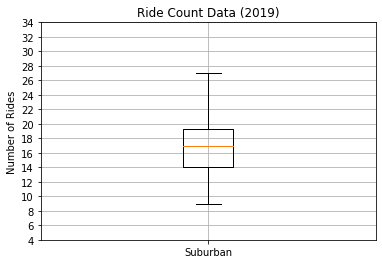

In [106]:
#create a box-and-whiskers plot for the suburban cities ride count - skilldrill 5.4.4
x_label = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_label)

#add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(4,36, step=2.0))
ax.grid()

plt.show()

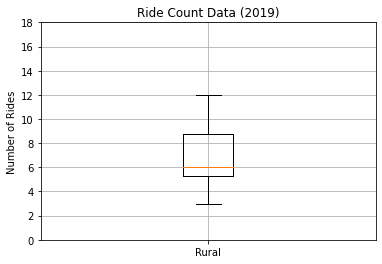

In [104]:
#create a box-and-whiskers plot for the rural cities ride count - skilldrill 5.4.4 - 2
x_label = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_label)

#add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0,20, step=2.0))
ax.grid()

plt.show()

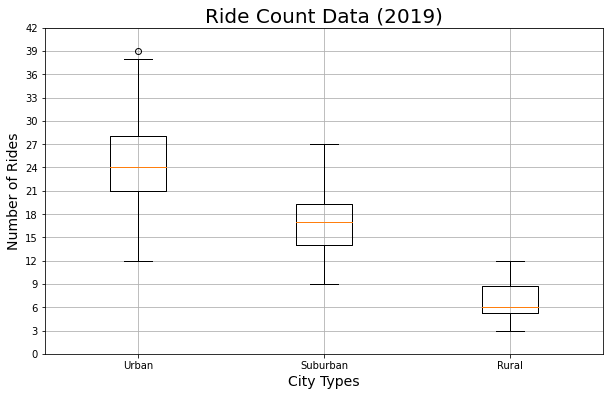

In [112]:
#add all ride count box-and-whiskers plots to the same graph

x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides",fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
#save the figure
plt.savefig('analysis/Fig2.png')
plt.show()

In [113]:
#get the city that matches 39 number of rides
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


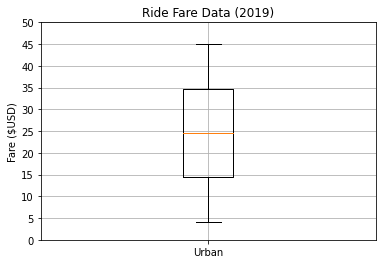

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [115]:
#create the box-and-whiskers plot for the urban fare data

x_label = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_label)

#add the title, y_axis label, grid and set yticks 

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()

plt.show()

print("Summary Statistics")
urban_fares.describe()

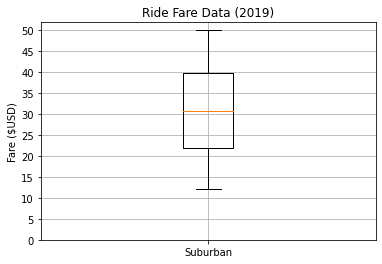

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [117]:
#skill drill 5.4.4 - box-and-whiskers for suburban & rural separate - 3

x_label = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_label)

#add title, y_axis label, grid & ticks

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,55, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
suburban_fares.describe()

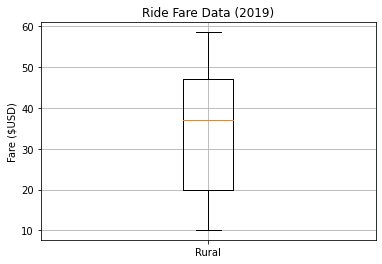

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [124]:
#continuation of skill drill

x_label = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_label)

#add title, y_axis label, grid & ticks

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(10,70,step=10.0))
ax.grid()

plt.show()

print("Summary Statistics")
rural_fares.describe()

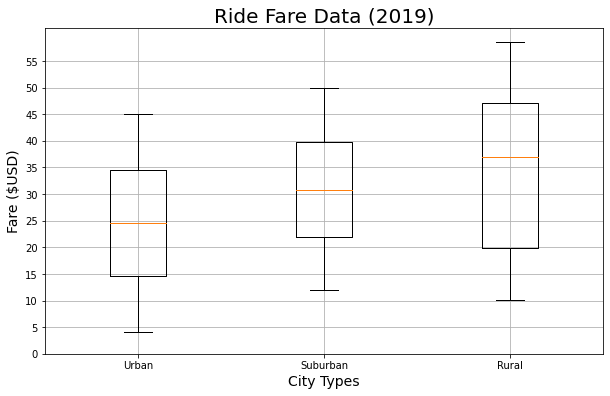

In [130]:
#create box-and-whiskers for all 3 city tipes - skilldrill 5.4.4 - 4

x_labels = ['Urban', 'Suburban', 'Rural']
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(fare_data, labels = x_labels)

#set title, y_label, grid & y ticks
ax.set_title("Ride Fare Data (2019)", fontsize = 20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()

plt.show()

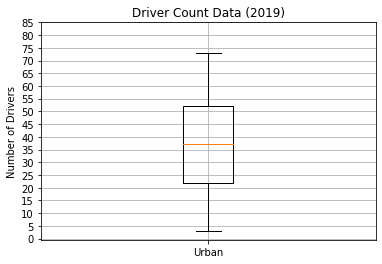

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [134]:
#create box-and-whisker plot for the urban driver count data

x_label = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_label)

#create title, y_label, grid & ticks
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

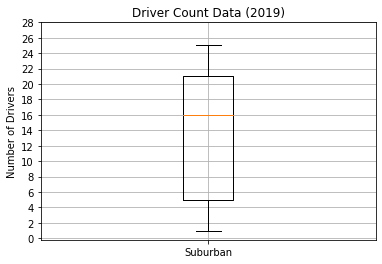

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [139]:
#create box-and-whisker plot for the suburban driver data - skilldrill 5.4.4 - 5
 
x_label = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels = x_label)

#create title, y_labels, grid & ticks
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,30,step = 2.0))
ax.grid()

plt.show()

print("Summary Statistics")
suburban_drivers.describe()

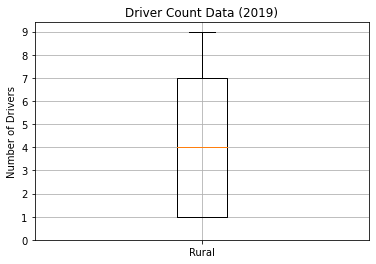

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [143]:
#create box-and-whiskers plot for the rural driver data - skilldrill 5.4.4 - 5 Continuation

x_label = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels = x_label)

#create title, y_axis label, grid & ticks
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,10,step=1.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

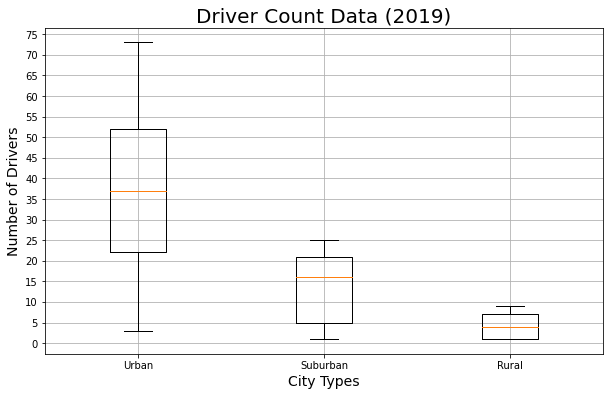

In [145]:
#create box-and-whisker plot for all city types - skilldrill 5.4.4 - 5 Continuation

x_labels = ['Urban', 'Suburban', 'Rural']
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_data, labels = x_labels)

#create title, y_axis label, grid & ticks
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,80,step=5.0))
ax.grid()

plt.show()